In [7]:
from __future__ import print_function

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


# TODO: This should be reworked!
# This version is not really a rework, but provides clearer output
# Calculation reworked for transfer functions of any order

In [8]:
# Input transfer function and Proportional controller range
Gk = 3.0
Gz = [[-2, 1]]
Gp = [[10, 1], [5, 1]]
Krange = np.linspace(-2, 3, 1000)

In [9]:
# Check for stability over given range
poly_zeros = 1
for i in Gz:
    poly_zeros *= sp.poly1d(i)
poly_poles = 1
for i in Gp:
    poly_poles *= sp.poly1d(i)

unstable_vec = []
for K in Krange:
    poly_char = float(K)*Gk*poly_zeros + poly_poles
    unstable_vec.append(
        any(np.real(r) > 0 for r in np.roots(poly_char.coeffs)))

# Output stability margin
trigger = 0
for i in range(0, len(Krange) - 1):
    if unstable_vec[i]:
        if unstable_vec[i] != unstable_vec[i - 1]:
            print('Change from stable to unstable at Kc = ' +
                  '%.2f' % Krange[i])
            Limit1 = Krange[i]
            trigger = 1
    else:
        if unstable_vec[i] != unstable_vec[i - 1]:
            print('Change from unstable to stable at Kc = ' +
                  '%.2f' % Krange[i])
            Limit2 = Krange[i]
            trigger = 1

if trigger == 0:
    print('No stability margins could be found')
else:
    print('Stable between Kc = ' + '%.2f' % Limit1 +
          ' and Kc = ' + '%.2f' % Limit2)

Change from unstable to stable at Kc = -0.33
Change from stable to unstable at Kc = 2.50
Stable between Kc = 2.50 and Kc = -0.33


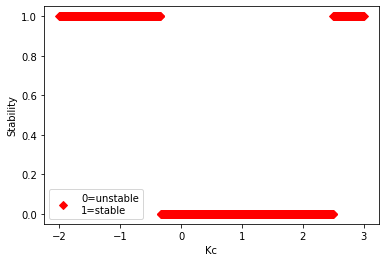

In [10]:
plt.plot(Krange, unstable_vec, 'rD', label='0=unstable\n1=stable')
plt.xlabel('Kc')
plt.ylabel('Stability')
plt.legend()
plt.show()